# Xarray Tutorial

![xarray image](https://i2.wp.com/numfocus.org/wp-content/uploads/2018/09/xarray-logo-square.png)


Xarray is an open source project and Python package that makes working with labelled multi-dimensional arrays simple, efficient, and fun!

Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. The package includes a large and growing library of domain-agnostic functions for advanced analytics and visualization with these data structures.

Xarray was inspired by and borrows heavily from pandas, the popular data analysis package focused on labelled tabular data. It is particularly tailored to working with netCDF files, which were the source of xarray’s data model, and integrates tightly with dask for parallel computing.

## Spatial Data & Xarray

Xarray is an efficient and useful way to read, edit, quality control, and display spatial data. It organizes spatial datasets quickly and succinctly. It also organizes metadata in a human friendly format. Xarray is especially good with the following:

- Gridded, multi-dimensional and large datasets, commonly used in earth sciences, but also
increasingly finance, engineering (signal/image processing), and biological sciences
- Integration with other data analysis packages such as Pandas
- I/O operations (NetCDF)
- Plotting


Xarray can do things that a low-level (but important!) package like numpy cannot.

## Xarray List of Functions & Descriptions

http://xarray.pydata.org/en/stable/api.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

# load in a built-in tutorial dataset from xarray
ds = xr.tutorial.load_dataset('air_temperature')

ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 244.0 244.09999 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

> Make note of the Data variables descriptor: this is our variable data variable name. Let's print it out and see what xarray can tell us about this variable

In [3]:
ds.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[241.2    , 242.5    , ..., 235.5    , 238.59999],
        [243.79999, 244.5    , ..., 235.29999, 239.29999],
        ...,
        [295.9    , 296.19998, ..., 295.9    , 295.19998],
        [296.29   , 296.79   , ..., 296.79   , 296.6    ]],

       [[242.09999, 242.7    , ..., 233.59999, 235.79999],
        [243.59999, 244.09999, ..., 232.5    , 235.7    ],
        ...,
        [296.19998, 296.69998, ..., 295.5    , 295.1    ],
        [296.29   , 297.19998, ..., 296.4    , 296.6    ]],

       ...,

       [[245.79   , 244.79   , ..., 243.98999, 244.79   ],
        [249.89   , 249.29   , ..., 242.48999, 244.29   ],
        ...,
        [296.29   , 297.19   , ..., 295.09   , 294.38998],
        [297.79   , 298.38998, ..., 295.49   , 295.19   ]],

       [[245.09   , 244.29   , ..., 241.48999, 241.79   ],
        [249.89   , 249.29   , ..., 240.29   , 241.68999],
        ...,
        [296.09   , 296.88998, ..., 295.69   , 

### We can break down air even further to really extract key data or metadata from it

In [4]:
ds.air.attrs

OrderedDict([('long_name', '4xDaily Air temperature at sigma level 995'),
             ('units', 'degK'),
             ('precision', 2),
             ('GRIB_id', 11),
             ('GRIB_name', 'TMP'),
             ('var_desc', 'Air temperature'),
             ('dataset', 'NMC Reanalysis'),
             ('level_desc', 'Surface'),
             ('statistic', 'Individual Obs'),
             ('parent_stat', 'Other'),
             ('actual_range', array([185.16, 322.1 ], dtype=float32))])

In [5]:
ds.air.values

array([[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
         238.59999],
        [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
         239.29999],
        [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
         241.7    ],
        ...,
        [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
         294.69998],
        [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
         295.19998],
        [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
         296.6    ]],

       [[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
         235.79999],
        [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
         235.7    ],
        [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
         238.5    ],
        ...,
        [296.4    , 295.9    , 296.19998, ..., 295.4    , 295.1    ,
         294.79   ],
        [296.19998, 296.69998, 296.79   , ..., 295.6    , 295.5    ,
   

In [6]:
type(ds.air.values)

numpy.ndarray

> At it's core, the data is still stored as a numpy array. Let's average this array by the time dimension...

#### Let's only keep air temperatures greater than 0 Kelvin (theoretical minimum temperature of the universe)

In [ ]:
ds = ds.where(ds.air > 0)

> Here we are using the **xarray.where()** function on **ds**, our xarray dataframe. Note that we need to specify that we want the air (variable within ds) values greater than 0.

In [11]:
temp_kelvin = ds.air.mean(dim='time')
# so what is temp now?
temp_kelvin


<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[260.37564, 260.1826 , 259.88593, ..., 250.81511, 251.93733, 253.43741],
       [262.7337 , 262.7936 , 262.7489 , ..., 249.75496, 251.5852 , 254.35849],
       [264.7681 , 264.3271 , 264.0614 , ..., 250.60707, 253.58247, 257.71475],
       ...,
       [297.64932, 296.95294, 296.62912, ..., 296.81033, 296.28793, 295.81622],
       [298.1287 , 297.93646, 297.47006, ..., 296.8591 , 296.77686, 296.44348],
       [298.36594, 298.38593, 298.11386, ..., 297.33777, 297.28104, 297.30502]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...

> temp is now a data array with the same lat/lon coordinates but only has 1 time dimension because we averaged it out

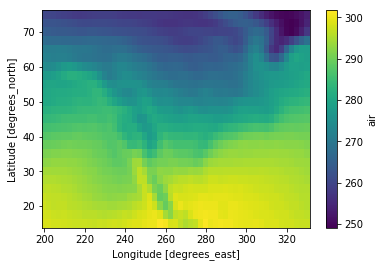

In [12]:
temp_kelvin.plot()

> Notice that the output code lists "matplotlib.collections.QuadMesh", which signals that although we only used xarray dataset in our code to visualize this data, we still use matplotlib quadmesh plotting function to generate a plot

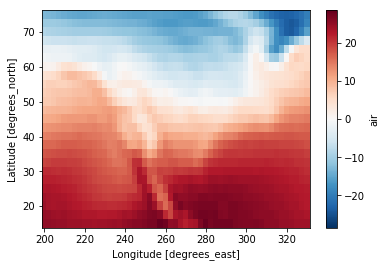

In [13]:
temp_celsius = temp_kelvin - 273.15 
temp_celsius.plot()

### Now that we have these datasets that have the same x-y dimensions, can we add them to our original dataset ds?

In [15]:
ds['temp_celsius'] = temp_celsius
ds['temp_kelvin'] = temp_kelvin
ds

<xarray.Dataset>
Dimensions:       (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat           (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 ...
  * lon           (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 ...
  * time          (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air           (time, lat, lon) float32 241.2 242.5 243.5 244.0 244.09999 ...
    temp_celsius  (lat, lon) float32 -12.774353 -12.967407 -13.264069 ...
    temp_kelvin   (lat, lon) float32 260.37564 260.1826 259.88593 259.48196 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

> Notice our new data variables have been added

In [27]:
ds.temp_kelvin

<xarray.DataArray 'temp_kelvin' (lat: 25, lon: 53)>
array([[260.37564, 260.1826 , 259.88593, ..., 250.81511, 251.93733, 253.43741],
       [262.7337 , 262.7936 , 262.7489 , ..., 249.75496, 251.5852 , 254.35849],
       [264.7681 , 264.3271 , 264.0614 , ..., 250.60707, 253.58247, 257.71475],
       ...,
       [297.64932, 296.95294, 296.62912, ..., 296.81033, 296.28793, 295.81622],
       [298.1287 , 297.93646, 297.47006, ..., 296.8591 , 296.77686, 296.44348],
       [298.36594, 298.38593, 298.11386, ..., 297.33777, 297.28104, 297.30502]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
Attributes:
    Description:  Mean air tempterature (through time)

In [28]:
ds.temp_kelvin.dims # dimensions of temp_celsius

('lat', 'lon')

In [29]:
ds.temp_kelvin.attrs

OrderedDict([('Description', 'Mean air tempterature (through time)')])

> There are no attributes for temp_kelvin, so let's add those!

In [30]:
ds.temp_kelvin.attrs['Description'] = 'Mean air tempterature (through time)'

In [31]:
ds.temp_kelvin.attrs

OrderedDict([('Description', 'Mean air tempterature (through time)')])

> We're done with this data, but we want to save what we did...how can we do that?
### We can write this dataset straight to a netcdf file !!!

In [ ]:
ds.to_netcdf('new_file.nc')

## Indexing Xarray Datasets

- We can index xarray datasets just like we learned in the numpy tutorial

In [32]:
ds.air[:, 1, 2] 

<xarray.DataArray 'air' (time: 2920)>
array([244.7    , 244.2    , 244.     , ..., 248.59   , 248.48999, 248.39   ],
      dtype=float32)
Coordinates:
    lat      float32 72.5
    lon      float32 205.0
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

> Notice how lat & lon values are now set, meaning that the data is stored [time, lat, lon]

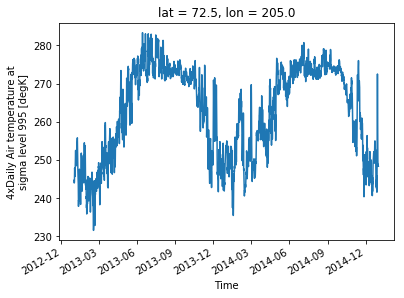

In [33]:
ds.air[:,1,2].plot()

- But remember, xarray is essentially an **advanced** numpy

In [37]:
ds.air.sel(lat=72.5,lon=205.0)

<xarray.DataArray 'air' (time: 2920)>
array([244.7    , 244.2    , 244.     , ..., 248.59   , 248.48999, 248.39   ],
      dtype=float32)
Coordinates:
    lat      float32 72.5
    lon      float32 205.0
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

- here we used the ds.air.**sel()** function, **sel()** standing for select
- This is the same output as ds.air[:,1,2]

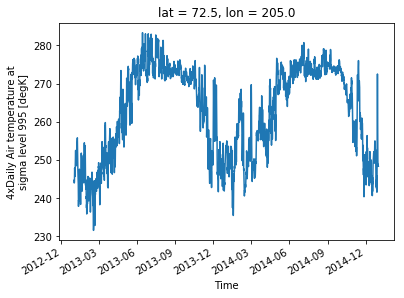

In [38]:
ds.air.sel(lat=72.5,lon=205.0).plot()

### but wait...there's more!

- we can also select via index instead of value. Let's grab the zeroth lat & lons...

In [44]:
lat0 = ds.lat[0]
lon0 = ds.lon[0]
print(lat0, lon0)

<xarray.DataArray 'lat' ()>
array(75., dtype=float32)
Coordinates:
    lat      float32 75.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y <xarray.DataArray 'lon' ()>
array(200., dtype=float32)
Coordinates:
    lon      float32 200.0
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X


In [45]:
ds.air.isel(lat=0, lon=0)

<xarray.DataArray 'air' (time: 2920)>
array([241.2    , 242.09999, 242.29999, ..., 243.48999, 245.79   , 245.09   ],
      dtype=float32)
Coordinates:
    lat      float32 75.0
    lon      float32 200.0
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

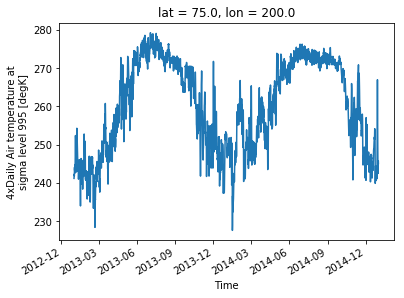

In [46]:
ds.air.isel(lat=0, lon=0).plot()

#### We can also do this for our other variables, although remember, they only have a single time dimension...

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-13.274353, -13.174353, -13.074353, -12.974353, -12.874353,
        -12.774353, -12.674353, -12.574353, -12.474353, -12.374353,
        -12.274353], dtype=float32),
 <a list of 10 Patch objects>)

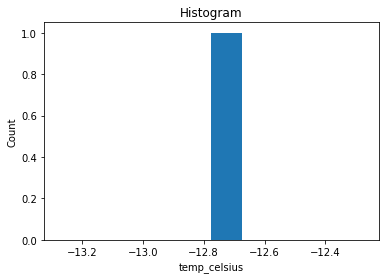

In [48]:
ds.temp_celsius.isel(lat=0, lon=0).plot()

#### let's look at a histogram of air temp now for 01/02/2013

(array([251., 532., 379., 296., 456., 613., 582., 510., 997., 684.]),
 array([232.39   , 239.361  , 246.332  , 253.30301, 260.274  , 267.245  ,
        274.216  , 281.187  , 288.15802, 295.129  , 302.1    ],
       dtype=float32),
 <a list of 10 Patch objects>)

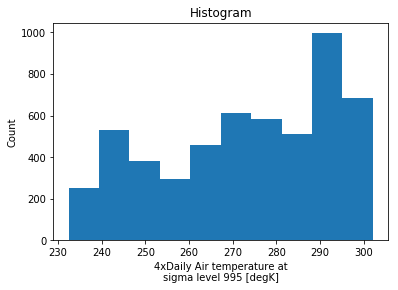

In [49]:
ds.air.sel(time='2013-01-02').plot()

#### or a single time value

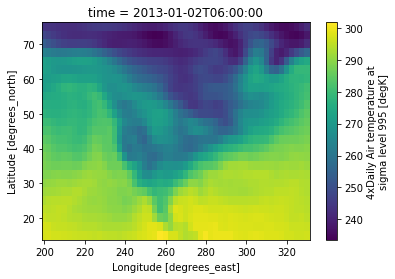

In [50]:
ds.air.sel(time='2013-01-02T06:00').plot()

## Xarray Assignment

#### Using the xarray tutorial dataset above, complete the following;

1) Plot the 200th time dimension to create a map of North American temperatures like the one above. 

2) Plot time series of Newark, DE (39.6837° N, 75.7497° W) for the entire time window (2013-2015)

3) Compute the average temperature for Newark, DE over the time series. Plot as histogram - (there will just be 1 value in histogram)

#### Submit Plots only to Canvas